In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 593 kB/s 


In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# We can see all columns in df.head() / and .tail()
pd.set_option('display.max_columns', None)

### Read in Crash Dataset

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1PLXI3THVVv-gM5yb-hSk4bYTxvRRa87h' #<-- You add in here the id from you google drive file, you can find it
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
df_crash  = pd.read_csv("file.csv")
df_crash.head(10)

,Unnamed: 0,CrashFactId,Name,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,Distance,CrashDate,CrashTime,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of
0,0,609603,CR-0000028982,0,0,0,0,11-001-0016,0.0,1/1/2011,0:09,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# read in Crash dataset
#df_crash = pd.read_csv('/content/drive/My Drive/Data270/Dataset/Crash_Clean.csv')

In [ ]:
# (49747, 127)
df_crash.shape

(49747, 127)

In [ ]:
df_crash.head(5)

,Unnamed: 0,CrashFactId,Name,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,Distance,CrashDate,CrashTime,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of
0,0,609603,CR-0000028982,0,0,0,0,11-001-0016,0.0,1/1/2011,0:09,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
df_crash.tail(5)

,Unnamed: 0,CrashFactId,Name,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,Distance,CrashDate,CrashTime,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of
49742,56038,651713,CR-0000085200,0,0,0,1,20-366-0293,135.0,12/31/2020,12:34,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

### Read in Vehicle Dataset

In [ ]:
file_id2 = '1t28A4BraEIdEkx5akOE8M4mXWfuPL_q_' #<-- You add in here the id from you google drive file, you can find it
download2 = drive.CreateFile({'id': file_id2})

# Download the file to a local disc
download2.GetContentFile('file2.csv')
df_veh  = pd.read_csv("file2.csv")

In [ ]:
# read in Vehicle dataset
#df_veh = pd.read_csv('/content/drive/My Drive/Data270/Dataset/Vehicles_Clean.csv')

In [ ]:
# (46927, 183)
df_veh.shape

(46927, 183)

In [ ]:
df_veh.head(5)

,Unnamed: 0,CrashName,Name,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Impairment Not Known,Impairment Physical,Sleepy/Fatigued,Sobriety_N/A,Under Drug Influence,Direction_N/A,Direction_Unknown,East,North,South,West,Bicycle,Bus - Other,Bus - School,Car,Car With Trailer,Construction Equipment,Emergency Vehicle,Ice Cream Truck,Light Rail Vehicle,Motorcycle/Moped,Panel Truck,PartyType_Other,PartyType_Unknown,Pedestrian,Scooter Motorized,Scooter Non-Motorized,Semi Truck,Skateboard,Train,Wheelchair,Backing,Changing Lanes,Crossing Into Opposing Lane,Entering Traffic,Making Left Turn,Making Right Turn,Making U-Turn,Merging,MovementPrecedingCollision_Other,MovementPrecedingCollision_Unknown,Other (Bike),Other (Ped),Other Unsafe Turning,Parked,Parking Maneuver,Passing Other Vehicles,Proceeding Straight,Ran Off Road,Slowing/Stopping,Stalled,Stopped,Traveling Wrong Way,DIS R1R/SIG,Defective Vehicle Equipment,Dis Control,Entering/Leaving Ramp,Following Too Close,Improper Lane Change,Improper Light,Improper Parking,Improper Passing,Improper Signal,Improper Turn,Inattention,Inva. Brakes,Lt of Center,Other Defect,Other Improper Turn,OtherAssociatedFactor_DUI,OtherAssociatedFactor_N/A,OtherAssociatedFactor_NoneApparent,OtherAssociatedFactor_Other,OtherAssociatedFactor_OtherViolation,OtherAssociatedFactor_Unknown,Previous Collision,Right Of Way,Runaway Vehicle,Speeding,Stop And Go Traffic,Unfamiliar With Road,Uninvolved Vehicle,Violation By Bike,Violation By Pedestrian,Vision Obscurement,12500,20002,21200,21202,21209,21235,21451,21453,21456,21457,21460,21461,21650,21651,21657,21658,21663,21703,21712,21750,21751,21752,21753,21754,21755,21800,21801,21802,21803,21804,21806,21949,21950,21951,21952,21953,21954,21955,21956,22100,22101,22102,22103,22105,22106,22107,22108,22109,22114,22350,22400,22450,22451,22500,22515,22517,22521,23101,23102,23103,23109,23116,23140,23152,23153,24002,24250,26452,26453,27360,27456,27465,29003,29004,ViolationCode_N/A,ViolationCode_Unknown
0,0,CR-0000064498,ACV-0000000032,0,50.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,CR-0000068721,ACV-0000000033,1,19.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,CR-0000064227,ACV-0000000034,1,16.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,CR-0000064719,ACV-0000000035,1,63.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,CR-0000069173,ACV-0000000036,1,23.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [ ]:
df_veh.tail(5)

,Unnamed: 0,CrashName,Name,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Impairment Not Known,Impairment Physical,Sleepy/Fatigued,Sobriety_N/A,Under Drug Influence,Direction_N/A,Direction_Unknown,East,North,South,West,Bicycle,Bus - Other,Bus - School,Car,Car With Trailer,Construction Equipment,Emergency Vehicle,Ice Cream Truck,Light Rail Vehicle,Motorcycle/Moped,Panel Truck,PartyType_Other,PartyType_Unknown,Pedestrian,Scooter Motorized,Scooter Non-Motorized,Semi Truck,Skateboard,Train,Wheelchair,Backing,Changing Lanes,Crossing Into Opposing Lane,Entering Traffic,Making Left Turn,Making Right Turn,Making U-Turn,Merging,MovementPrecedingCollision_Other,MovementPrecedingCollision_Unknown,Other (Bike),Other (Ped),Other Unsafe Turning,Parked,Parking Maneuver,Passing Other Vehicles,Proceeding Straight,Ran Off Road,Slowing/Stopping,Stalled,Stopped,Traveling Wrong Way,DIS R1R/SIG,Defective Vehicle Equipment,Dis Control,Entering/Leaving Ramp,Following Too Close,Improper Lane Change,Improper Light,Improper Parking,Improper Passing,Improper Signal,Improper Turn,Inattention,Inva. Brakes,Lt of Center,Other Defect,Other Improper Turn,OtherAssociatedFactor_DUI,OtherAssociatedFactor_N/A,OtherAssociatedFactor_NoneApparent,OtherAssociatedFactor_Other,OtherAssociatedFactor_OtherViolation,OtherAssociatedFactor_Unknown,Previous Collision,Right Of Way,Runaway Vehicle,Speeding,Stop And Go Traffic,Unfamiliar With Road,Uninvolved Vehicle,Violation By Bike,Violation By Pedestrian,Vision Obscurement,12500,20002,21200,21202,21209,21235,21451,21453,21456,21457,21460,21461,21650,21651,21657,21658,21663,21703,21712,21750,21751,21752,21753,21754,21755,21800,21801,21802,21803,21804,21806,21949,21950,21951,21952,21953,21954,21955,21956,22100,22101,22102,22103,22105,22106,22107,22108,22109,22114,22350,22400,22450,22451,22500,22515,22517,22521,23101,23102,23103,23109,23116,23140,23152,23153,24002,24250,26452,26453,27360,27456,27465,29003,29004,ViolationCode_N/A,ViolationCode_Unknown
46922,46922,CR-0000085886,ACV-0000175754,0,21.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
46923,46923,CR-0000085936,ACV-0000175862,1,42.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46924,46924,CR-0000085939,ACV-0000175867,0,26.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46925,46925,CR-0000085938,ACV-0000175865,1,28.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46926,46926,CR-0000087195,ACV-0000178306,0,58.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [ ]:
# Quick check
df_veh.isna().sum().sum()

0

# Combine Datasets

In [ ]:
# Check amount of rows that both datasets share on Name and CrashName (our "primary key")
vals =  set(df_crash['Name']).intersection(df_veh['CrashName']) 
count = 0
for i in vals:
  count = count + 1
  
print (count)

41944


In [ ]:
# Need to rename Crash Data set Name -> CrashName to make merging easier
df_crash = df_crash.rename(columns={"Name": "CrashName"})

In [ ]:
# Ensure CrashName for both datasets is still 41,944 rows 
vals =  set(df_crash['CrashName']).intersection(df_veh['CrashName']) 
count = 0
for i in vals:
  count = count + 1
  
print (count)

41944


In [ ]:
# combine both datasets with an outer join on CrashName
combined_df = pd.merge(df_crash, df_veh, on= 'CrashName', how='outer')

In [ ]:
# Before Age change (56045, 310)
# After age change (54730, 309)
combined_df.shape

(54730, 309)

In [ ]:
# 6298 (7803 due to age change) Are missing due to the handling of noise from Crash data
combined_df.isna().sum()

Unnamed: 0_x             4983
CrashFactId              4983
CrashName                   0
MinorInjuries            4983
ModerateInjuries         4983
                         ... 
27465                    7803
29003                    7803
29004                    7803
ViolationCode_N/A        7803
ViolationCode_Unknown    7803
Length: 309, dtype: int64

In [ ]:
# Drop the missing. Missing from combining datasets outer join
combined_df.dropna(inplace=True)

In [ ]:
# Before age change (49735, 310)
# After age change (41944, 309)
combined_df.shape

(41944, 309)

In [ ]:
combined_df.isna().sum().sum()

0

In [ ]:
combined_df.head()

,Unnamed: 0_x,CrashFactId,CrashName,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,Distance,CrashDate,CrashTime,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Unnamed: 0_y,Name,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking 

In [ ]:
# DELETE THIS CELL LATER 
# (CREATED by Edward on 11/8/22)
# Output here to CSV 
#combined_df.reset_index(inplace=True)
#combined_df.drop('index', axis= 1, inplace=True)

#from google.colab import files

# Use this to save dataset to CSV
#combined_df.to_csv('San_Jose_Combined_Data.csv') 
#files.download('San_Jose_Combined_Data.csv')

In [ ]:
# Need to drop the following Columns based on .head()
# Unnamed: 0_y, Name, Unnamed: 0_x, CrashFactId, CrashName, TcrNumber
combined_df.drop(columns=['CrashFactId', 'Name','Unnamed: 0_x','Unnamed: 0_y', 'CrashName','TcrNumber'], inplace=True)

In [ ]:
# Befor age change (49735, 306)
# After age change (41944, 303)
combined_df.shape

(41944, 309)

In [ ]:
combined_df.head()

,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,Distance,CrashDate,CrashTime,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had N

In [ ]:
# Fix the index to be in order
combined_df.reset_index(inplace=True)
combined_df.drop('index', axis= 1, inplace=True)

In [ ]:
combined_df.head()

,CrashFactId,CrashName,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,Distance,CrashDate,CrashTime,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Unnamed: 0_y,Name,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under I

In [ ]:
combined_df.drop('Unnamed: 0_x',axis = 1,inplace=True)

In [ ]:
#combined_df.to_csv('Data_Combined_WithDate.csv')

# Data Exploration

In [ ]:
#import pandas_profiling
#from pandas_profiling import ProfileReport  # use force install if error is thrown

#!pip install pandas_profiling
#!pip install --upgrade --force-reinstall pandas_profiling

In [ ]:
#profile = ProfileReport(combined_df)
#profile

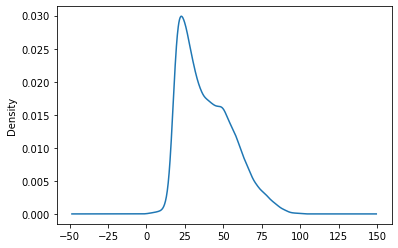

In [ ]:
# Age dist 
combined_df['Age'].plot(kind='kde')

In [ ]:
combined_df['Age'].value_counts()

22.0     1327
21.0     1294
23.0     1282
20.0     1278
26.0     1263
         ... 
5.0         3
96.0        3
99.0        3
1.0         2
100.0       2
Name: Age, Length: 100, dtype: int64

In [ ]:
combined_df = combined_df[combined_df.Age >15] #Since there are nosiy data such as Age > 16

combined_df.reset_index(inplace=True)
combined_df.drop('index',axis=1,inplace=True)

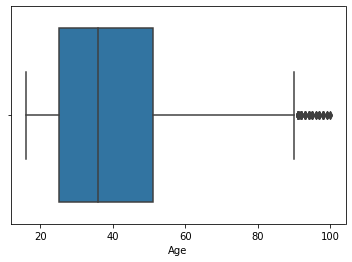

In [ ]:
sns.boxplot(combined_df.Age) #checking for outliers

In [ ]:
df1 = combined_df.copy()

Q1 = np.percentile(combined_df.Age, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(combined_df.Age, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", combined_df.Age.shape)
 
# Upper bound

upper = np.where(combined_df.Age >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(combined_df.Age <= (Q1-1.5*IQR))

 
#Removing the Outliers 
#combined_df.drop(upper[0], inplace = True)
#combined_df.drop(lower[0], inplace = True)
 
#print("New Shape: ", combined_df.Age.shape)

Old Shape:  (41423,)


In [ ]:
#sns.boxplot(combined_df.Age)

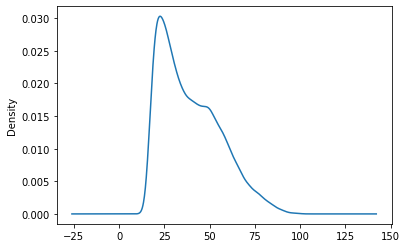

In [ ]:
combined_df['Age'].plot(kind='kde')

In [ ]:
from google.colab import files

# Use this to save dataset to CSV
#combined_df.to_csv('San_Jose_Combined_Data.csv') 
#files.download('San_Jose_Combined_Data.csv')

In [ ]:
combined_df.shape

(41423, 303)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41423 entries, 0 to 41422
Columns: 303 entries, MinorInjuries to ViolationCode_Unknown
dtypes: float64(301), object(2)
memory usage: 95.8+ MB


In [ ]:
combined_df.describe()

,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,Distance,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Imp

In [ ]:
# drop date columns

combined_df.drop(columns=['CrashDate','CrashTime'], inplace=True)

In [ ]:
combined_df.shape

(41423, 301)

In [ ]:
combined_df.head(-5)

,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,Distance,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Imp

# Data Normalization

In [ ]:
# Min-Max for non-OHE features. 
pd.set_option('max_rows', 400)
combined_df.dtypes

MinorInjuries                                                   float64
ModerateInjuries                                                float64
SevereInjuries                                                  float64
FatalInjuries                                                   float64
Distance                                                        float64
CityDamageFlag_False                                            float64
CityDamageFlag_True                                             float64
ShortFormFlag_False                                             float64
ShortFormFlag_True                                              float64
PedestrianAction_Approaching/Leaving School Bus                 float64
PedestrianAction_Crossing - Not In Crosswalk                    float64
PedestrianAction_Crossing In Crosswalk - At Intersection        float64
PedestrianAction_Crossing In Crosswalk - Not At Intersection    float64
PedestrianAction_In Road - Includes Shoulder                    

In [ ]:
combined_df.describe()

,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,Distance,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Imp

In [ ]:
# Need to normalize based on .describe() min & max
# Distance, Age
# Look at why sex has "2.0" for max

combined_df['Sex'].value_counts()

1.0    25204
0.0    16053
2.0      166
Name: Sex, dtype: int64

In [ ]:
# impute unknown Sex "2.0" with mode "1.0"
sex_clean = {0: 0.0, 1: 1.0, 2: 1.0}

combined_df.Sex = [sex_clean[item] for item in combined_df.Sex]

In [ ]:
# all clean now  :)
combined_df['Sex'].value_counts()

1.0    25370
0.0    16053
Name: Sex, dtype: int64

In [ ]:
# Normalize Distance and Age
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_norm = ['Age','Distance']
combined_df[cols_to_norm] = scaler.fit_transform(combined_df[cols_to_norm])

In [ ]:
# Age is now normalized (min max)
combined_df['Age'].value_counts()

0.071429    1327
0.059524    1294
0.083333    1282
0.047619    1278
0.119048    1263
0.095238    1233
0.107143    1193
0.130952    1115
0.035714    1086
0.154762    1046
0.142857    1034
0.166667     966
0.178571     945
0.023810     929
0.190476     885
0.214286     842
0.202381     817
0.238095     815
0.226190     764
0.261905     745
0.273810     739
0.285714     728
0.297619     706
0.309524     702
0.369048     702
0.321429     701
0.404762     695
0.392857     692
0.333333     691
0.250000     685
0.345238     678
0.380952     670
0.416667     669
0.357143     664
0.428571     611
0.440476     597
0.452381     588
0.011905     585
0.476190     547
0.488095     545
0.464286     544
0.511905     487
0.500000     485
0.523810     451
0.547619     407
0.535714     399
0.559524     362
0.583333     326
0.595238     313
0.571429     311
0.000000     310
0.607143     281
0.619048     236
0.630952     218
0.666667     201
0.654762     195
0.642857     194
0.678571     157
0.714286     1

In [ ]:
# Distance
combined_df['Distance'].value_counts()

0.000000    26654
0.235023      872
0.460829      601
0.230415      506
0.146360      484
0.138249      479
0.092166      422
0.921659      407
0.691244      404
0.276498      373
0.184332      281
0.069124      274
0.345622      271
0.207373      247
0.414747      213
0.552995      213
0.115207      211
0.046083      201
0.368664      186
0.322581      170
0.161290      143
0.165899      142
0.082949      141
0.110599      126
0.829493      125
0.152074      124
0.096774      121
0.221198      112
0.253456      109
0.299539      108
0.124424      106
0.193548      103
0.599078      103
0.483871      101
0.055300      100
0.506912       99
0.645161       94
0.576037       93
0.737327       88
0.391705       87
0.248848       83
0.783410       82
0.179724       80
0.331797       78
0.967742       78
0.304147       76
0.129032       74
0.147465       74
0.119816       71
0.622120       69
0.437788       69
0.073733       69
0.262673       68
0.668203       67
0.101382       67
0.175115  

In [ ]:
combined_df[['Distance','Age','Sex']].describe()

,Distance,Age,Sex
count,41423.000000,41423.000000,41423.000000
mean,0.133554,0.278298,0.612462
std,0.237455,0.196977,0.487194
min,0.000000,0.000000,0.000000
25%,0.000000,0.107143,0.000000
50%,0.000000,0.238095,1.000000
75%,0.184332,0.416667,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
# show data after Normalization
combined_df.head(-5)

,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,Distance,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Imp

In [ ]:
# Fix the index to be in order
combined_df.reset_index(inplace=True)
combined_df.drop('index', axis= 1, inplace=True)

In [ ]:
# Handle target feature by taking 4 columns and combining into one column
# 
combined_df['Severity'] = 0
for i in range(len(combined_df)):
  if combined_df['MinorInjuries'][i] == 1:
    combined_df['Severity'][i] = 1
  elif combined_df['ModerateInjuries'][i] == 1:
    combined_df['Severity'][i] = 2
  elif combined_df['SevereInjuries'][i] == 1:
    combined_df['Severity'][i] = 3
  elif combined_df['FatalInjuries'][i] == 1:
    combined_df['Severity'][i] = 4
  else:
    combined_df['Severity'][i] = 0

In [ ]:
# 0 = no injury
# 1 = minor
# 2 = moderate
# 3 = severe
# 4 = fatal
combined_df['Severity'].value_counts()

0    20999
1    14521
2     4652
3      990
4      261
Name: Severity, dtype: int64

In [ ]:
combined_df.shape

(41423, 302)

In [ ]:
# Now we can drop MinorInjuries, ModeratInjuries, SevereInjuries, FatalInjuries
combined_df.drop(columns=['MinorInjuries','ModerateInjuries','SevereInjuries','FatalInjuries'], inplace=True)

In [ ]:
combined_df.shape

(41423, 298)

In [ ]:
combined_df.head(5)

,Distance,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Impairment Not Known,Impairment Physical,Sleepy/Fatigued,Sobrie

In [ ]:
combined_df['Severity'].describe()

count    41423.000000
mean         0.672066
std          0.814879
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: Severity, dtype: float64

In [ ]:
# for model building
#combined_df.to_csv('San_Jose_Combined_Data_model_ready.csv') 
#files.download('San_Jose_Combined_Data_model_ready.csv')

# Baseline model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#y = combined_df['Severity']
#X = combined_df.drop('Severity',axis=1)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(combined_df, target = 'Severity', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)
print('Training Data:')
print(x_train.shape), print(y_train.shape)
print('Validation Data:')
print(x_valid.shape), print(y_valid.shape)
print('Testing Data:')
print(x_test.shape), print(y_test.shape)

Training Data:
(28996, 297)
(28996,)
Validation Data:
(6213, 297)
(6213,)
Testing Data:
(6214, 297)
(6214,)


(None, None)

In [ ]:
x_train.shape

(28996, 297)

In [ ]:
x_test.shape

(12427, 297)

In [ ]:
#x_train.to_csv('X_train.csv') 
#y_train.to_csv('y_train.csv') 
#x_test.to_csv('X_test.csv') 
#y_test.to_csv('y_test.csv')

In [ ]:
model = LogisticRegression(max_iter = 200, random_state = 42)

In [ ]:
model.fit(x_train,y_train)
y_pred_baseline = model.predict(x_test)
print('Acurracy of train ',(model.score(x_train, y_train)*100))
print('Acurracy of test ',(accuracy_score(y_test, y_pred_baseline)*100))

Acurracy of train  72.81004276451924
Acurracy of test  71.7251367878983


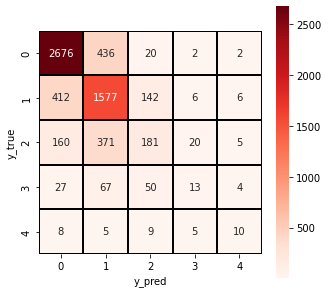

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_baseline)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [1]:
print(classification_report(y_test,y_pred_baseline))

NameError: ignored

# Data Regularization

In [ ]:
# Lasso L1 AND L2
model = LogisticRegression(max_iter = 200, random_state = 42)
lasso = LogisticRegression(penalty='l1', solver='liblinear',random_state=42)
ridge = LogisticRegression(penalty='l2', random_state=42)

In [ ]:
clfs = {'baseline_logistic_regression' : model, 'lasso_log_reg': lasso, 'ridge_log_reg': ridge}

In [ ]:
def train_classifier(clf, X_train, y_train):      #function to train all the models
    clf.fit(X_train, y_train)

def predict_labels(clf, X_test):                 # function to predict all the models
    return (clf.predict(X_test))  

pred_scores = []
for k,v in clfs.items():
    train_classifier(v,x_train,y_train)
    pred = predict_labels(v,x_test)
    pred_scores.append((k, accuracy_score(y_test,pred),f1_score(y_test,pred,average = 'weighted')))

In [ ]:
scores = pd.DataFrame(pred_scores,columns = ['Classifier','Accuracy Score','F1 Score'])
scores = scores.set_index('Classifier')
scores

,Accuracy Score,F1 Score
Classifier,,
baseline_logistic_regression,0.716263,0.700811
lasso_log_reg,0.714734,0.696718
ridge_log_reg,0.715458,0.699589


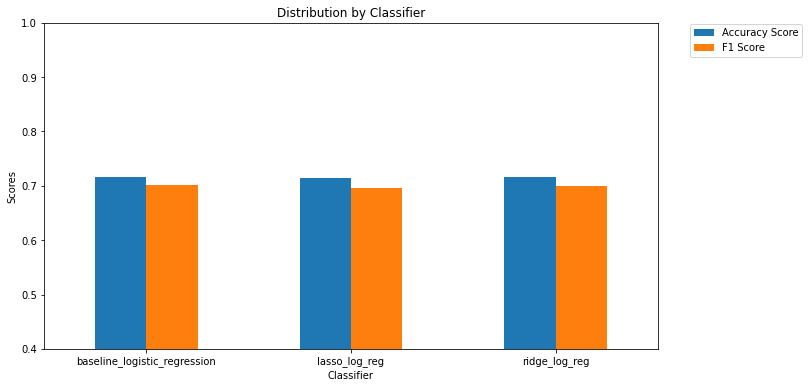

In [ ]:
scores.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center')
plt.ylabel('Scores')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(rotation=0)
plt.show()

# Data Reduction

In [ ]:
# Cite Source: Hands-On Machine Learning w/ Scikit-Learn by Aurelien Geron ************

# Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
# simpler to choose the number of dimensions that add up to 95% variance
from sklearn.decomposition import PCA

# Computes the minimum number of dimensions required to preserve 95% of the training
# set's variance
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 75
d

75

In [ ]:
# n_components is the ratio of variance we wish to preserve
# We know that 75 features will preserve 95% variance
# So we will set 'n_components' = d 
pca = PCA(n_components=d)

# Apply to x_train and x_test
X_train_reduced = pca.fit_transform(x_train)
X_test_reduced = pca.transform(x_test)
X_validation_reduced = pca.transform(x_valid)

In [ ]:
# Check number of columns
# 75 @ 95% variance
pca.n_components_

75

In [ ]:
# check variance to ensure 95%
pca.explained_variance_ratio_.sum()  

0.9499941682628902

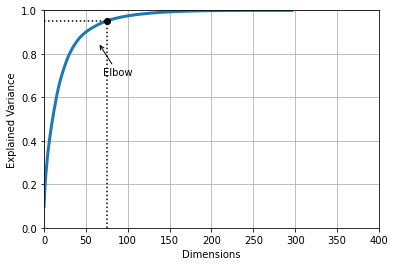

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

In [ ]:
# x_train shape before PCA
x_train.shape

(28996, 297)

In [ ]:
# X_train_reduced is our x_train after PCA is performed. 
X_train_reduced.shape

(28996, 75)

In [ ]:
# X_test_reduced is our x_test after PCA
X_test_reduced.shape

(6214, 75)

In [ ]:
X_validation_reduced.shape

(6213, 75)

In [ ]:
print('Training Data:')
print(X_train_reduced.shape), print(y_train.shape)
print('Validation Data:')
print(X_validation_reduced.shape), print(y_valid.shape)
print('Testing Data:')
print(X_test_reduced.shape), print(y_test.shape)

Training Data:
(28996, 75)
(28996,)
Validation Data:
(6213, 75)
(6213,)
Testing Data:
(6214, 75)
(6214,)


(None, None)

In [ ]:
train_df = pd.DataFrame(X_train_reduced)
validate_df = pd.DataFrame(X_validation_reduced)
test_df = pd.DataFrame(X_test_reduced)

In [ ]:
test_df = pd.DataFrame(X_test_reduced)

In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,-1.008822,1.732798,1.018269,0.515891,-0.354901,-0.676685,-0.806995,-0.468025,0.410404,-0.366029,-0.655220,0.147755,0.074162,0.253333,-0.144600,0.227394,0.546893,-0.515539,0.256608,-0.244083,-0.178990,-0.387770,0.161915,0.202755,-1.026313,-0.041975,0.961852,-0.098918,-0.063794,-0.168930,0.271086,0.119189,0.171586,-0.031242,0.230552,-0.040538,0.127678,-0.140147,-0.076421,-0.025066,0.007088,-0.028888,-0.027987,0.014200,0.116785,0.052680,0.044193,-0.146586,0.030410,-0.000911,0.108375,-0.200513,-0.049560,-0.007985,-0.091447,-0.041603,0.148318,0.032697,0.015728,0.074368,-0.011643,-0.035840,-0.146664,0.019174,-0.109113,-0.065783,-0.029452,0.100865,-0.096031,-0.206503,-0.219094,0.019899,0.048089,0.137751,0.123513
1,0.338390,0.312624,1.493532,0.279143,1.835454,2.188155,-0.243868,0.023295,0.308668,-0.448188,1.057167,0.082582,0.186116,0.594714,0.334223,-0.486582,1.309104,0.107759,0.097118,0.292231,0.544711,0.264422,0.189242,0.077965,0.201339,0.716746,-0.285388,0.093892,0.216739,0.265429,0.223368,-0.312288,-0.709669,0.274826,-0.998923,0.122606,-0.555235,0.070983,0.069789,-0.050010,-0.308008,-0.064730,-0.134036,-0.118385,-0.120017,0.444317,-0.365670,-0.227984,-0.102299,-0.128589,0.087289,-0.240006,0.017204,0.008965,-0.431496,-0.108263,-0.406823,0.084560,0.937452,0.211798,0.002094,-0.356958,-0.179529,-0.156813,0.332820,-0.295246,-0.186060,0.033376,-0.038586,0.082697,0.225631,0.018122,0.055198,0.205130,0.159996
2,-0.651990,-1.244259,-0.235345,-0.431885,0.307883,-0.446208,0.595746,-0.255337,-0.631650,0.085866,-0.084158,-0.225064,0.795928,0.647512,0.230552,-0.566939,-0.138944,0.341848,0.030595,-0.300080,-0.451919,0.128680,0.657598,0.162689,-0.027983,-0.175114,-0.380183,-0.056973,0.427599,-0.458021,0.178119,0.149329,0.335079,0.243871,-0.224391,0.080042,-0.004788,-0.259790,-0.084053,-0.033184,-0.050437,0.118257,-0.143281,0.000264,0.026333,0.095066,-0.014445,-0.141976,-0.083497,-0.258191,0.184110,-0.010520,-0.000101,-0.040697,0.186379,-0.425321,0.062545,-0.164326,0.021385,-0.079411,-0.031473,-0.012359,0.028882,0.010168,-0.005936,-0.018483,-0.035310,0.024440,-0.063332,-0.090352,0.017503,0.059717,-0.079636,-0.111467,0.014110
3,0.178021,-0.799609,1.354455,-0.521103,1.411786,0.001693,-1.013078,0.137253,0.564811,-0.197956,0.191720,-0.728181,0.124849,-0.117110,0.097439,0.337493,-0.203269,0.671279,-0.182587,-0.063932,-0.285582,-0.076015,0.398948,-0.249378,-0.151273,-0.033980,0.777094,-0.167035,-0.252311,-0.182656,-0.212500,0.203236,-0.184520,-0.007893,0.736549,-0.194479,0.406960,0.002031,0.042375,0.216101,0.026122,0.157009,-0.017649,0.243051,0.125213,0.225317,-0.385516,0.071949,0.090815,0.226697,0.220867,-0.317570,-0.082566,0.500763,0.449302,0.231590,0.235751,-0.186650,-0.406981,0.099657,-0.481931,0.191069,-0.259372,-0.887926,0.082944,-0.202704,-0.293676,-0.065772,-0.047132,-0.134851,0.382953,0.036476,0.104713,0.224082,-0.283108
4,-1.041734,-0.304736,0.333221,-0.919910,-0.049584,0.463118,0.359906,-0.497084,0.336576,0.027434,0.014481,-0.859049,-0.029832,-0.034370,-0.886713,-0.033055,-0.874467,-0.022766,0.310306,0.399544,-0.476093,0.327388,0.079819,0.609359,0.720457,0.046683,-0.093232,-0.031051,0.143026,-0.140850,-0.306177,-0.441890,-0.120264,0.148364,-0.151175,-0.101992,0.257950,0.077588,0.024586,0.028652,0.056062,-0.244096,0.049586,-0.005007,0.392770,0.273799,-0.213899,-0.318271,0.193663,0.177745,0.084276,-0.213278,0.013827,0.776758,-0.021846,0.234577,-0.102595,0.249426,0.127197,-0.221235,0.001748,0.058073,-0.186900,0.057053,-0.224287,-0.009400,0.072566,0.195940,0.128122,0.237386,0.026934,0.010307,0.047266,0.108942,-0.083370


In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.431011,1.496665,0.874729,0.261071,-0.613081,-0.325199,-0.416613,-0.021119,0.448262,-0.941971,0.119415,-0.506185,0.004026,0.417524,-0.137096,1.183237,-0.217313,0.387868,-0.690408,-0.056115,-0.327721,0.331617,0.387533,-0.199417,0.834319,0.082833,0.094083,-0.057070,0.133077,-0.569501,-0.383162,0.496398,0.248707,0.490431,-0.707428,-0.037734,0.321011,-0.505349,-0.290700,-0.191843,-0.143215,0.115273,-0.029996,0.007440,-0.050257,0.023179,0.029559,-0.098507,-0.064703,0.087085,-0.007692,0.047690,0.005268,-0.081406,-0.063047,0.105713,0.041168,-0.082736,0.006193,-0.023776,-0.033346,-0.029183,0.082770,0.016114,0.052400,0.051639,-0.050545,0.014211,-0.025712,-0.104714,-0.038113,0.056207,0.034201,0.025657,-0.026594
1,-0.924196,-0.489344,0.861949,1.276509,-0.544445,-0.054738,0.492802,-1.077580,-0.538482,0.958375,0.506749,0.327939,-0.754299,-0.796781,-0.103147,0.249189,-0.388781,0.563871,0.305227,-0.266727,0.713836,0.064986,-0.096586,-0.325433,-0.292885,0.205878,-0.107781,0.106218,0.262352,0.298482,-0.462420,0.308116,0.072580,-0.340813,-0.387223,-0.001933,-0.260735,0.253841,0.157136,0.509404,0.121765,0.138297,0.040811,0.343508,-0.094680,0.522930,0.724091,0.215336,-0.158577,0.424320,-0.130277,-0.133453,0.057038,-0.071639,0.095924,-0.243247,-0.001043,-0.180872,-0.020659,0.100445,0.071545,0.018636,0.044999,-0.073525,-0.187058,-0.133089,0.064291,0.458371,-0.006443,0.133122,0.352066,-0.307910,-0.194129,0.004864,-0.046599
2,0.863767,0.224296,-0.736938,0.683205,0.004380,0.733018,-0.619008,-0.691422,0.720822,0.547714,-0.579747,0.592261,0.041413,-0.330005,0.317236,0.713706,0.454323,1.426011,0.058433,0.317406,-0.169558,-0.360026,0.162071,-0.541755,0.247845,0.033672,-0.023946,-0.000489,0.410529,-0.095178,0.269439,0.176335,0.091962,-0.441294,0.277357,-0.129579,-0.259210,0.024617,-0.153355,-0.651539,-0.281919,0.239241,0.108366,0.082837,0.199895,-0.133132,0.034014,-0.048012,0.037423,0.070279,-0.056652,0.007085,-0.026613,0.104558,-0.107260,-0.134823,0.087605,-0.100860,-0.033436,0.119856,0.228217,0.177714,-0.178915,0.023852,-0.095876,-0.097207,0.077371,0.075362,0.051194,0.145123,0.180133,-0.084518,-0.023965,-0.040030,-0.048548
3,-0.599463,-0.961674,-0.555194,0.011145,-0.028033,0.145355,0.513477,0.097245,-0.106411,1.000309,0.462181,0.418784,0.638251,-0.491803,-0.590406,0.149619,-0.091356,0.524672,0.511448,-0.425801,0.254153,-0.045733,-0.033862,-0.593632,-0.497985,-0.209289,-0.160661,1.120443,0.058779,0.300018,0.039057,0.111129,0.084522,-0.610318,0.014133,-0.074191,-0.150299,0.310947,-0.114678,-0.568726,-0.274799,0.502608,-0.351147,0.353639,0.137258,-0.141119,0.060003,-0.347937,-0.739719,0.002909,-0.150326,0.202447,0.021023,0.442195,-0.439900,0.208318,0.763852,0.061227,0.135341,-0.159902,0.056888,-0.059180,-0.004469,0.015824,0.201835,0.050669,-0.057064,0.071697,-0.078581,-0.029538,0.077712,-0.033981,-0.041860,0.007712,-0.033332
4,-0.241518,-0.922015,0.024374,-0.434244,0.848884,-0.442154,0.344167,-0.209467,-0.603053,0.072165,-0.287491,-0.328059,0.698174,0.208337,-0.646502,0.498220,-0.445050,0.151395,-0.741429,0.004927,-0.291974,-0.257373,-0.175617,-0.301741,-0.150412,-0.170286,0.034798,-0.126595,-0.401845,0.241504,-0.078099,-0.161956,0.407183,0.425144,0.316697,-0.011572,-0.720032,0.160593,-0.051846,-0.182179,-0.186068,-0.085149,-0.053168,-0.225215,-0.010690,0.046504,-0.007708,-0.059931,0.064764,0.024071,0.004882,-0.170854,-0.034324,-0.167859,-0.039463,0.009201,0.102224,-0.010801,0.032879,-0.000524,-0.045717,-0.063667,-0.041146,0.035439,0.023625,-0.018119,-0.000576,0.065690,-0.033526,0.012021,-0.001181,-0.055917,-0.023988,-0.062719,0.132138


In [ ]:
validate_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,-0.541900,0.524606,-1.160496,-0.155588,0.298291,1.146705,-0.769894,0.484120,-0.439378,0.271758,-0.475057,-0.435804,-0.845803,-0.040432,-0.388913,0.029000,-0.150012,0.067614,-0.288421,-0.907238,0.297106,-0.862902,0.255867,0.330055,0.267066,-0.448943,0.125720,-0.074088,-0.032060,-0.196722,0.065077,-0.176673,-0.109606,0.166110,-0.000106,-0.105198,-0.220965,0.057549,-0.039632,-0.029391,0.097335,-0.071061,0.181526,0.121613,0.033592,-0.060651,-0.059193,0.022980,0.031901,-0.112550,-0.044282,0.323298,-0.007556,-0.204447,0.036822,-0.029680,0.093871,0.113801,0.007700,0.120870,-0.134316,-0.092669,0.043488,-0.050910,-0.204715,0.090619,-0.036584,0.122262,0.005096,0.050867,0.018159,0.129676,0.088804,-0.039055,0.003200
1,-0.696515,1.102190,-1.103474,-0.822219,0.090599,-0.267785,-0.135192,0.743975,0.888928,-0.209786,-0.477928,1.004049,-0.115690,0.080394,-0.720149,0.361460,-0.461730,-0.096223,0.040553,-0.219652,0.254728,-0.044795,0.113447,-0.143052,0.556038,0.053456,-0.154957,1.066618,-0.003209,-0.128956,-0.012138,-0.059448,0.204642,-0.039871,-0.056703,-0.077279,0.022961,-0.030240,-0.086969,0.039111,0.049676,-0.077528,0.069217,-0.100983,-0.013012,-0.041821,0.025895,0.197297,0.010314,-0.084744,-0.002107,-0.040829,0.004639,0.003990,-0.042934,-0.008697,-0.052149,-0.021852,-0.014379,-0.089944,0.044855,0.013198,-0.005876,-0.003125,0.040985,-0.001597,-0.003290,0.005953,-0.045231,0.020290,0.026619,-0.029070,0.001469,-0.033822,-0.014447
2,1.809382,-0.870321,1.156107,0.631660,-0.315384,-0.729008,0.379526,0.229005,0.487086,-0.125898,-0.159890,-1.083373,0.154014,0.486833,-0.339468,-0.266479,0.017747,-0.010112,0.310960,-0.490256,0.477749,0.253731,1.104203,0.151140,-0.058965,-0.008928,0.353896,1.120154,-0.040275,-0.674058,-0.083904,0.241410,-0.126694,0.444715,-0.000514,-0.254192,0.145297,-0.252479,-0.151733,0.086540,-0.181913,0.081183,-0.024735,0.006924,0.057349,0.023426,0.026993,-0.071120,0.045236,0.249323,-0.052215,-0.131872,-0.012351,0.053839,-0.065961,0.190095,0.029789,0.030839,-0.014175,0.055713,-0.016580,-0.060250,0.015196,0.013159,0.009792,0.076993,-0.022518,-0.050746,-0.008367,-0.001598,0.004011,-0.065649,0.016527,0.052848,-0.001284
3,-1.053406,-0.836978,0.297964,-0.057193,0.204710,0.504952,0.805638,-1.316119,0.306991,1.005251,-0.721629,0.078316,0.070649,-0.558358,-0.306594,0.062840,-0.717308,0.675077,-0.622784,-0.102578,0.689566,0.723597,-0.219336,0.305764,-0.060540,0.050773,0.087855,0.003498,0.490641,-0.445977,-0.073965,0.204420,-0.365428,-0.420247,-0.375272,0.090837,-0.382555,0.026802,0.031249,0.192468,0.232885,-0.217395,0.342357,0.184370,-0.110103,-0.098382,-0.076039,-0.064962,0.134535,0.074991,0.092604,-0.107166,-0.099679,-0.253888,-0.011335,0.121039,0.205167,0.080099,0.073283,-0.194318,-0.010822,0.055533,-0.051731,0.007733,0.012314,-0.050875,0.049880,-0.165074,-0.046312,-0.023961,0.013837,-0.047052,-0.016392,0.058142,0.000722
4,-0.339552,1.477388,0.278537,0.371622,-0.538640,-1.040594,0.097849,1.671175,-0.020411,0.614022,0.336637,0.419075,-0.927095,0.182549,-0.222137,-0.015336,-0.218387,-0.799568,0.087377,-0.378326,0.188288,-0.102038,0.098385,0.261707,0.298521,-0.499578,-0.323883,-0.581074,-0.284514,0.057287,0.482765,-0.232691,-0.070255,0.195554,0.421739,-0.284654,-0.079685,0.208290,-0.016711,0.080505,-0.074149,0.158889,0.439505,0.032967,-0.679880,0.121155,0.014180,-0.193909,0.130606,0.054452,0.039604,-0.054771,-0.016158,0.063444,-0.070131,-0.209580,0.269806,0.020841,-0.069811,0.464723,0.164790,-0.073159,-0.248911,-0.064485,-0.514063,0.017647,0.108084,0.031309,0.114455,0.420343,0.189014,0.024016,-0.052437,-0.020821,0.066457


In [ ]:
test_df.head(-5)

In [ ]:
# Test PCA
model2 = LogisticRegression(max_iter = 200, random_state = 42)
pca_mod = LogisticRegression(max_iter = 200, random_state = 42)

pred_scores2 = []

clfs2 = {'baseline_logistic_regression' : model2, 'pca_log_reg': pca}

pca_mod.fit(X_train_reduced,y_train)
y_pred_pca = pca_mod.predict(X_test_reduced)

model2.fit(x_train,y_train)
y_pred_baseline2 = model.predict(x_test)

pred_scores2.append((list(clfs2.keys())[0],accuracy_score(y_test,y_pred_baseline2),f1_score(y_test,y_pred_baseline2,average='weighted')))
pred_scores2.append((list(clfs2.keys())[1],accuracy_score(y_test,y_pred_pca),f1_score(y_test,y_pred_pca,average='weighted')))


In [ ]:
# pca 0.711866  0.694810 @ 95% variance
# From 297 features down to just 75 and our scores are nearly the exact same. This is good. 
scores2 = pd.DataFrame(pred_scores2,columns = ['Classifier','Accuracy Score','F1 Score'])
scores2 = scores2.set_index('Classifier')
scores2

,Accuracy Score,F1 Score
Classifier,,
baseline_logistic_regression,0.716263,0.700811
pca_log_reg,0.711354,0.692191


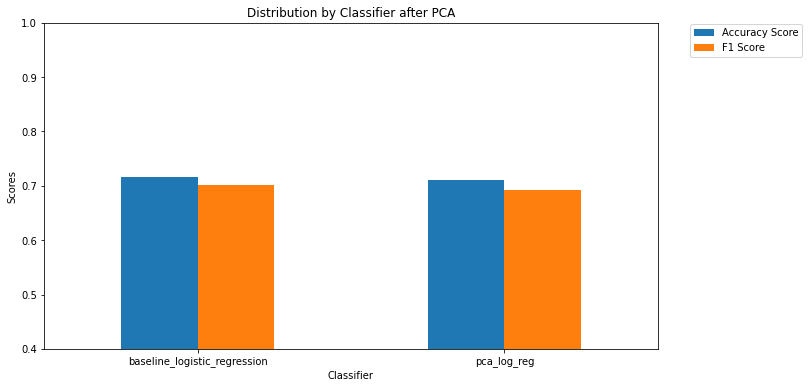

In [ ]:
scores2.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center')
plt.ylabel('Scores')
plt.title('Distribution by Classifier after PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# PCA vs Random Forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)

In [ ]:
# Random Forest feature importance in descending order
importances = rnd_clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = combined_df.columns[0:]
 
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Age                            0.085959
 2) ShortFormFlag_True             0.044276
 3) ShortFormFlag_False            0.038632
 4) Distance                       0.032211
 5) VD_Unknown                     0.030828
 6) ViolationCode_Unknown          0.021306
 7) ViolationCode_N/A              0.019806
 8) Sex                            0.019533
 9) VD_Major                       0.016691
10) Had Not Been Drinking          0.016298
11) VehicleInvolvedWith_Other Vehicle 0.015777
12) South                          0.014184
13) North                          0.013885
14) East                           0.013732
15) West                           0.013592
16) Proceeding Straight            0.013431
17) VD_Moderate                    0.012611
18) Lighting_Daylight              0.012598
19) Impairment Not Known           0.012499
20) OtherAssociatedFactor_N/A      0.012414
21) VD_Minor                       0.012265
22) PrimaryCollisionFactor_Unknown 0.012186
23) 22350                    

### Sampling

In [ ]:
# SMOTE
# Show frequency of Severity column

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

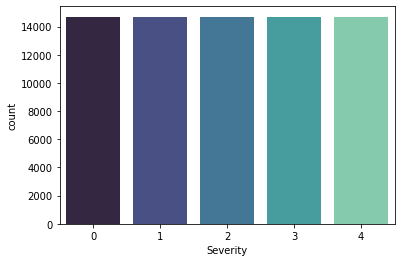

In [ ]:
sns.countplot(y_res,palette = 'mako');

In [ ]:
# 0    20955
# 1    14486
# 2     4637
# 3      987
# 4      256
y_res.value_counts()

0    14706
2    14706
1    14706
4    14706
3    14706
Name: Severity, dtype: int64

In [ ]:
def train_classifier_smote(clf, X_train, y_train):      #function to train all the models
    clf.fit(X_train, y_train.ravel())

def predict_labels_smote(clf, X_test):                 # function to predict all the models
    return (clf.predict(X_test)) 

pred_scores_smote = []
for k,v in clfs.items():
    train_classifier_smote(v,X_res,y_res)
    pred = predict_labels_smote(v,x_test)
    pred_scores_smote.append((k, accuracy_score(y_test,pred),f1_score(y_test,pred,average = 'weighted')))

In [ ]:
scores_smote = pd.DataFrame(pred_scores_smote,columns = ['Classifier','Accuracy Score','F1 Score'])
scores_smote = scores_smote.set_index('Classifier')
scores_smote

,Accuracy Score,F1 Score
Classifier,,
baseline_logistic_regression,0.651082,0.678514
lasso_log_reg,0.652209,0.679362
ridge_log_reg,0.651887,0.679752


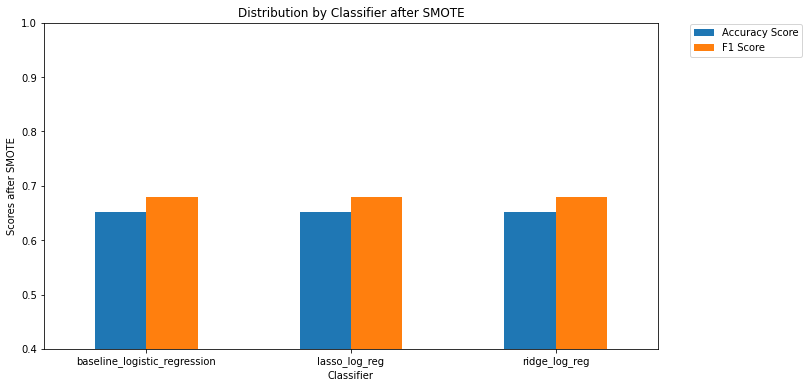

In [ ]:
scores_smote.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center')
plt.ylabel('Scores after SMOTE')
plt.title('Distribution by Classifier after SMOTE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(rotation=0)
plt.show()

# Output File

In [ ]:
from google.colab import files

# Use this to save dataset to CSV
#Final_df.to_csv('San_Jose_Combined_Data.csv') 
#files.download('San_Jose_Combined_Data.csv')